# Programming Basics and Data Analytics with Python  
## **Project Title: APP RATING PREDICTION**


*Importing necessary packages* 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Questions:


**1. Load the data file using pandas**

In [5]:
df = pd.read_csv('C:/Users/PRATHIPA/Desktop/DA Capstone Projects/1569582940_googleplaystore/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


> * Read .CSV file using read_csv() method from pandas, and stored it in a data frame named `df`.

**2. Check for null values in the data. Get the number of null values for each column.** 

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

> * Checked for null values in each column using **isnull.sum()** method to get the count of null values.
> * Use `DROPNA()` method to drop all NA values 

**3. Drop records with nulls in any of the columns.** 

In [8]:
df.dropna(inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them:  <br>**

*4.1 Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric. <br>*
       
*4.1.1 Extract the numeric value from the column.*


In [9]:
indexNames=df[df['Size']=='Varies with device'].index
df.drop(indexNames,inplace=True)


> *FIrst of all drop rows having size as `Varies with device`. As it is not going to help us predict our model.

In [10]:

df['Size_M']=df['Size'].str[-1]
df['Size_M']

0        M
1        M
2        M
3        M
4        M
        ..
10833    k
10834    M
10836    M
10837    M
10840    M
Name: Size_M, Length: 7723, dtype: object

> * Extract the last letter from the size columnn which denotes `m` is Mb. `k` is Kb. so it helps to convert our column to a numeric field.

In [11]:
df['Size_V']=df['Size'].str[:-1]
df['Size_V']

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10833    619
10834    2.6
10836     53
10837    3.6
10840     19
Name: Size_V, Length: 7723, dtype: object

> * Extract the numeric value which means the size of the apps and convert the column to float data type

In [12]:
df['Size_F']=df.Size_V.astype('float')

*4.1.2 Multiply the value by 1,000, if size is mentioned in Mb*

In [13]:
df.loc[df['Size_M'] =='M','Size_F'] = df['Size_F']*1000
df['Size_F']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10840    19000.0
Name: Size_F, Length: 7723, dtype: float64

> * Multiplied all Mb values with 1000 and got all the values in the same size that is in kb and stored the values in new column names `Size_F`.

***As we got our structured size column, then lets delete other columns related to size.***

In [14]:
del df['Size_V']
del df['Size_M']
del df['Size']

*4.2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).*

In [15]:
df['Reviews_I'] = df.Reviews.astype('int')

In [16]:
del df['Reviews']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Installs        7723 non-null   object 
 4   Type            7723 non-null   object 
 5   Price           7723 non-null   object 
 6   Content Rating  7723 non-null   object 
 7   Genres          7723 non-null   object 
 8   Last Updated    7723 non-null   object 
 9   Current Ver     7723 non-null   object 
 10  Android Ver     7723 non-null   object 
 11  Size_F          7723 non-null   float64
 12  Reviews_I       7723 non-null   int32  
dtypes: float64(2), int32(1), object(10)
memory usage: 1.0+ MB


**4.3 Installs field is currently stored as string and has values like 1,000,000+. <br>**

*4.3.1 Treat 1,000,000+ as 1,000,000*

*4.3.2 remove ‘+’, ‘,’ from the field, convert it to integer*

In [17]:
df['Install_V']=df['Installs'].str.replace('[,,+]','',regex=True).astype('int')

In [18]:
df['Install_V']
del df['Installs']

> Extracted only numeric values from install column by replacing `, and +` sign with ` ` and converted the values to `int` type and named the coulmn as Install_V. Finally dropped the old install column.

*4.4 Price field is a string and has **Dollar** symbol. Remove **Dollar** sign, and convert it to numeric.*

In [20]:
df['Price_C']=df['Price'].str.replace('$','',regex=True).astype('float')
df['Price_C'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price_C, dtype: float64

In [21]:
del df['Price']

>  Removed `$` symbol using replace method and converted price column from string to float. 

**5. Sanity checks:**

*5.1 Average rating should be between 1 and 5 as only these values are allowed on the play store.Drop the rows that have a value outside this range.*

In [22]:
indexNames = df[df['Rating']> 5].index
df.drop(indexNames,inplace=True)           

> Dropped rows having more than Rating value 5.

*5.2 Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.*

In [23]:
indexNames = df[df['Reviews_I']> df['Install_V']].index
indexNames
df.drop(indexNames,inplace=True)

> Dropped rows having more reviews than installs.

*5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.*

In [24]:
indexNames = df[(df['Type']=='Free') & (df['Price_C']>0)].index
df.drop(indexNames,inplace=True)

> Dropped rows if the app type is free and the price value is greater than zero.

**6. Performing univariate analysis** 

**6.1 Boxplot for Price <br>**
*Are there any outliers? Think about the price of usual apps on Play Store.*

<AxesSubplot:>

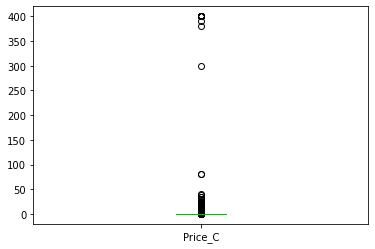

In [21]:
df['Price_C'].plot.box()


**6.2 Boxplot for Reviews <br>**
*Are there any apps with very high number of reviews? Do the values seem right?*

<AxesSubplot:>

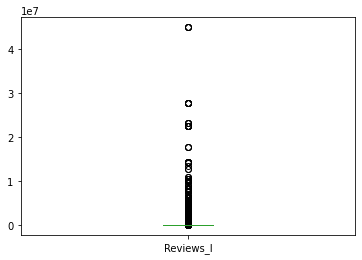

In [22]:
df['Reviews_I'].plot.box()


**6.3 Histogram for Rating<br>**
*How are the ratings distributed? Is it more toward higher ratings?*

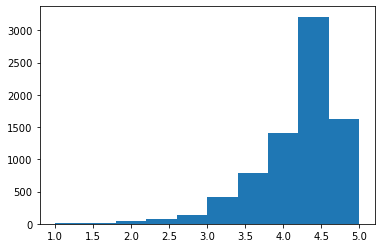

In [23]:
mlt.hist(df['Rating'])

mlt.show()

    6.4 Histogram for Size
    

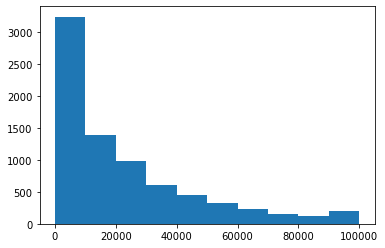

In [24]:
mlt.hist(df['Size_F'])
mlt.show()

> **Observations:<br>**
>        
>    1. In the first two box plots (price and Reviews) there are just a lot of zeros for those groups.
>       That means all quartiles are 0 (hence the box is reduced to a line), and we are left with the outliers (the points)
>   
>    2. Rating Histogram *  is  a left-skewed histogram. It  has a peak to the right of center, with the mode closer to the 
>       right and greater than either mean or median. 
>    
>    3. This shape indicates that the preponderance of any outliers is lesser than the mode. and the peak shows the   
>       data is more towards higher rating.
>            
>    4. Size Histogram* is right skewed histogram. it has a peak to the left of center. <br>
>    
>    5. In this mode is closer to the left and lesser than either mean or median.
            
    

**7. Outlier Treatment**

**7.1 Price: From the box plot, it seems like there are some apps with very high price.<br>**
**A price of `$200` for an application on the Play Store is very high and suspicious!<br>**
    *Check out the records with very high price<br>*
    *7.1.1 Is 200 indeed a high price?<br>*
    *7.1.2 Drop these as most seem to be junk apps<br>*

In [25]:
df.drop(df[df['Price_C']>=200].index,inplace=True)

>**Observations**
>    1. Looking at the box plot we can say our records have with very high price.
>    2. Indeed `$200` is a high price, so we dropped all the rows having price greater than or equals to 200.
    

**7.2 Reviews: Very few apps have very high number of reviews.<br>** 
    *These are all star apps that don’t help with the analysis and, in fact, will skew it.* 
    *Drop records having more than 2 million reviews.*

In [26]:
df.drop(df[df['Reviews_I']>2000000].index,inplace=True)

>**Observations**
>1. Dropped star apps having more than 2 million reviews.


**7.3 Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.<br>**
    *7.3.1 Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99<br>*
    *7.3.2 Decide a threshold as cutoff for outlier and drop records having values more than that*

In [27]:
# Percentiles using quantile() from pandas.
df.Install_V.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99])


0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Install_V, dtype: float64

In [28]:
# let me fix my threshold to 90 percentile which is 10000000.0
threshold=df.Install_V.quantile(0.9)
df[df['Install_V']>threshold]

,App,Category,Rating,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_F,Reviews_I,Install_V,Price_C
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000.0,215644,50000000,0.0
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,Free,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up,35000.0,1002861,100000000,0.0
225,Secure Folder,BUSINESS,3.8,Free,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up,8600.0,14760,50000000,0.0
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,Free,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up,35000.0,1002859,100000000,0.0
346,imo beta free calls and text,COMMUNICATION,4.3,Free,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up,11000.0,659395,100000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10378,BMX Boy,GAME,4.2,Free,Everyone,Racing,"September 20, 2017",1.16.33,4.1 and up,12000.0,839206,50000000,0.0
10408,Shoot Hunter-Gun Killer,GAME,4.3,Free,Teen,Action,"August 8, 2018",1.1.2,4.1 and up,27000.0,320334,50000000,0.0
10429,Talking Tom Bubble Shooter,FAMILY,4.4,Free,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up,54000.0,687136,50000000,0.0
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,Free,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up,21000.0,660613,50000000,0.0


> **Observation**
>    1. 176 records are installed more than 10000000 users.
   

In [29]:
# drop 176 records.
df.drop(df[df['Install_V']>threshold].index,inplace= True)

**8. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.**


*8.1 Make scatter plot/joinplot for Rating vs. Price*
*What pattern do you observe? Does rating increase with price?*

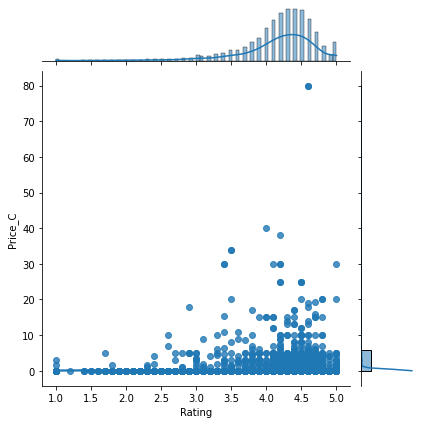

In [30]:
sns.jointplot(x='Rating',y='Price_C',kind='reg',data=df)
mlt.show()

>**Observation**
>    1. The correlation between Rating and price has left skewed pattern.
>    2. Rating is increasing while the price is 0 as well. 
>        However paid apps ratings are also increasing with price in most of the cases.

*8.2 Make scatter plot/joinplot for Rating vs. Size. Are heavier apps rated better?*

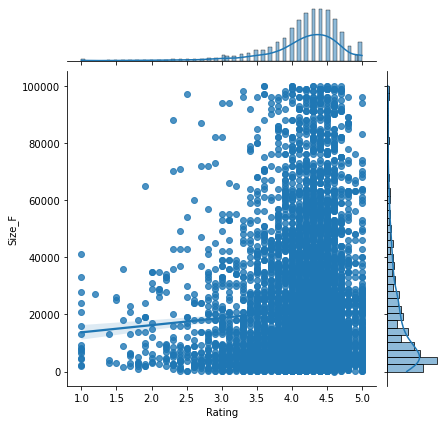

In [31]:
sns.jointplot(x='Rating', y='Size_F',kind='reg',data=df)
mlt.show()

>**Observation**
>    1. Apps having very less size has high variance in rating.
>    2. The plot shows that heavier apps has better rating in all the cases.
>    3. No correlation between the variable.

*8.3 Make scatter plot/joinplot for Rating vs. Reviews. Does more review mean a better rating always?*

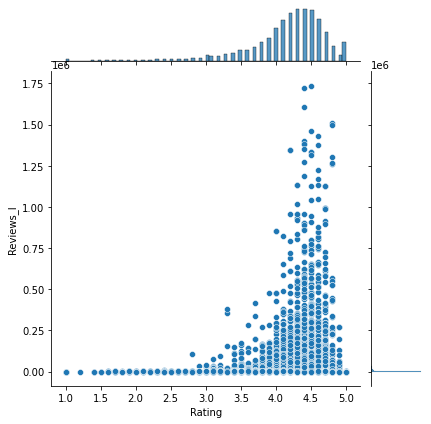

In [32]:
sns.jointplot(x='Rating',y='Reviews_I',kind='scatter',data=df)
mlt.show()

> **Observation**
>    1. The plot derives that more reviews the better rating.
    

*8.4 Make boxplot for Rating vs. Content Rating. Is there any difference in the ratings? Are some types liked better?*

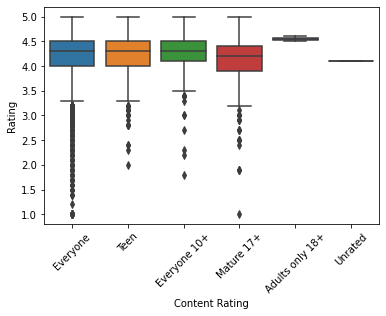

In [33]:
ax= sns.boxplot(x='Content Rating',y='Rating',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
mlt.show()

> **Observation**
>    1. There are no much difference with ratings between various content. 
>    2. However every content type has outliers, whereas 'Adults only 18+' has no outlier and has less variance with the higher ratings.
>    3. Therefore we can conclude 'Adults only 18+' type of apps are liked better.

*8.5 Make boxplot for Ratings vs. Category. Which genre has the best ratings?* 

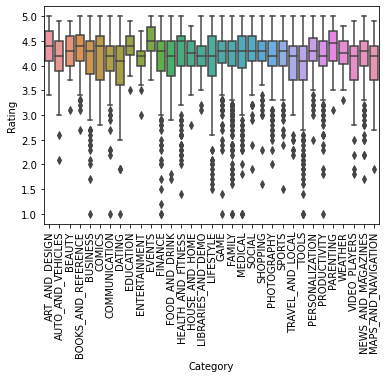

In [34]:
ax = sns.boxplot(x='Category', y='Rating', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
mlt.show()

>**Observation**
>    1. 'Events' Category has no outlier and has best ratings as well compared to the other catogories.

**9. Data preprocessing<br>**
    *create a copy of the dataframe to make all the edits. Name it inp1.*

In [25]:
inp1 = df
inp1.head()

,App,Category,Rating,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_F,Reviews_I,Install_V,Price_C
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000.0,159,10000,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000.0,967,500000,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700.0,87510,5000000,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000.0,215644,50000000,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800.0,967,100000,0.0


*9.1 Reviews and Install have some values that are still relatively very high. 
     Before building a linear regression model, you need to reduce the skew.
     Apply log transformation (np.log1p) to Reviews and Installs.*

In [36]:
np.log1p(inp1.Reviews_I)

0         5.075174
1         6.875232
2        11.379520
4         6.875232
5         5.123964
           ...    
10833     3.806662
10834     2.079442
10836     3.663562
10837     1.609438
10840    12.894981
Name: Reviews_I, Length: 7307, dtype: float64

In [37]:
np.log1p(inp1.Install_V)

0         9.210440
1        13.122365
2        15.424949
4        11.512935
5        10.819798
           ...    
10833     6.908755
10834     6.216606
10836     8.517393
10837     4.615121
10840    16.118096
Name: Install_V, Length: 7307, dtype: float64

*9.2 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.*

In [26]:
inp1.drop(['Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)
inp1.head()

,App,Category,Rating,Type,Content Rating,Genres,Size_F,Reviews_I,Install_V,Price_C
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,Free,Everyone,Art & Design,19000.0,159,10000,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,Free,Everyone,Art & Design;Pretend Play,14000.0,967,500000,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,Free,Everyone,Art & Design,8700.0,87510,5000000,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,Free,Teen,Art & Design,25000.0,215644,50000000,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,Free,Everyone,Art & Design;Creativity,2800.0,967,100000,0.0


*9.3 Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric.
Name of dataframe should be inp2.*

In [28]:
inp2 = inp1

In [29]:
inp2['Genre'] = inp2['Genres'].str.split(';',n=-1,expand=False)


In [30]:
inp2.drop('Genres',axis=1,inplace=True)

In [31]:
inp2=  inp2.explode('Genre')
inp2.head()

,App,Category,Rating,Type,Content Rating,Size_F,Reviews_I,Install_V,Price_C,Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,Free,Everyone,19000.0,159,10000,0.0,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,Free,Everyone,14000.0,967,500000,0.0,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,Free,Everyone,14000.0,967,500000,0.0,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,Free,Everyone,8700.0,87510,5000000,0.0,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,Free,Teen,25000.0,215644,50000000,0.0,Art & Design


In [33]:
inp2_dummies= pd.get_dummies(data=inp2,prefix=['Cate','Gen','ConRat'],prefix_sep='_',
                             columns=['Category','Genre','Content Rating'])
inp2_dummies.head()

,App,Rating,Type,Size_F,Reviews_I,Install_V,Price_C,Cate_ART_AND_DESIGN,Cate_AUTO_AND_VEHICLES,Cate_BEAUTY,...,Gen_Trivia,Gen_Video Players & Editors,Gen_Weather,Gen_Word,ConRat_Adults only 18+,ConRat_Everyone,ConRat_Everyone 10+,ConRat_Mature 17+,ConRat_Teen,ConRat_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,Free,19000.0,159,10000,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.9,Free,14000.0,967,500000,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.9,Free,14000.0,967,500000,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,Free,8700.0,87510,5000000,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,4.5,Free,25000.0,215644,50000000,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


***Save the target variable in y. In our Data set Rating is the Target Variable.Then save other independent variables in X.***

In [34]:

X = inp2_dummies.drop('Rating',axis=1)
X.drop(['App','Type'],axis=1,inplace=True)
X.head()

,Size_F,Reviews_I,Install_V,Price_C,Cate_ART_AND_DESIGN,Cate_AUTO_AND_VEHICLES,Cate_BEAUTY,Cate_BOOKS_AND_REFERENCE,Cate_BUSINESS,Cate_COMICS,...,Gen_Trivia,Gen_Video Players & Editors,Gen_Weather,Gen_Word,ConRat_Adults only 18+,ConRat_Everyone,ConRat_Everyone 10+,ConRat_Mature 17+,ConRat_Teen,ConRat_Unrated
0,19000.0,159,10000,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,14000.0,967,500000,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,14000.0,967,500000,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,8700.0,87510,5000000,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,25000.0,215644,50000000,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
y = inp2_dummies['Rating']
y.head()

0    4.1
1    3.9
1    3.9
2    4.7
3    4.5
Name: Rating, dtype: float64

**10. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.<br>**
**11. Separate the dataframes into X_train, y_train, X_test, and y_test.**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

X_train :  (5391, 96)
X_test :  (2311, 96)
y_train :  (5391,)
y_test :  (2311,)


>* The Data set has been split as Train and test data with 70:30 Ratio.
>* The shapes have been printed as the output.


**12. Model building<br>**

    12.1 Use linear regression as the technique

    12.2 Report the R2 on the train set

In [47]:
regr = linear_model.LinearRegression()


> * We now created an instance of the model, which we did simply calling the LinearRegression function from Scikit-Learn:
> * We now fit the model on the training data

In [48]:
regr.fit(X_train, y_train)

LinearRegression()

In [49]:
pred = regr.predict(X_train)
train_set_r2 = r2_score(y_train,pred)
print('Train set R2 score: ',train_set_r2)

Train set R2 score:  0.061991881713338026


> **Train Set R2 Score is 0.06199**
>* R2 Value The closer towards 1, the better the fit
>* Now that the model has been fit we can make predictions by calling the predict command. 
    We are making predictions on the testing set:

In [50]:
pred = regr.predict(X_test)

In [51]:
test_set_r2 = r2_score(y_test,pred)
print('Test set R2 score: ',test_set_r2)

Test set R2 score:  0.04888903261408328


> **Test set R2 Score is 0.04888**

> ## Submitted By: Prathipa J